### 1. Import the dependecies

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### 2. Load the Dataset

In [5]:
# Load Solar analysis dataset
df = pd.read_csv("../data/togo-dapaong_qc.csv")

In [6]:
df.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


#### 2.1. Summary Statistics & Missing-Value Report

In [7]:
# Overview of numeric columns
print("The description of the numeric columns:")
print(df.describe())
# Overview of categorical columns
print("---------------------------------")
print("The description of the categorical columns:")
print(df.describe(include=['object']))
# Overview of all columns
print("---------------------------------")
print("The description of all columns:")
print(df.describe(include='all'))
# Overview of the dataset
print("---------------------------------")
print("An overview of the dataset: the first 5 rows")
print(df.head())
# Overview of the dataset
print("----------------------------------")
print("An overview of the dataset: the last 5 rows")
print(df.tail())

The description of the numeric columns:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000

In [6]:
# Overview of the dataset
print("----------------------------------")
print("An overview of the dataset: a random sample of 5 rows")
print(df.sample(5))
# Overview of the dataset
print("----------------------------------")
print("An overview of the dataset: the shape of the dataset")
print(df.info())

----------------------------------
An overview of the dataset: a random sample of 5 rows
               Timestamp     GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
315797  2022-03-16 07:18    11.4   -0.3    9.1   15.9   14.7  27.6  19.9  2.1   
503062  2022-07-24 08:23   159.7    1.0  158.5  149.8  149.9  24.8  90.1  1.7   
489034  2022-07-14 14:35   911.0  657.0  308.8  794.7  782.3  31.8  66.9  4.1   
417822  2022-05-26 03:43    -1.5   -0.3   -1.5    0.0    0.0  28.7  64.0  4.6   
486063  2022-07-12 13:04  1010.0  769.5  241.0  894.0  890.0  32.8  62.4  3.1   

        WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
315797     2.6      0.4   71.2      9.3  994         0            0.0   27.8   
503062     2.6      0.4  223.1     15.8  997         0            0.0   31.4   
489034     5.6      0.9  233.9     12.0  993         0            0.0   46.6   
417822     5.9      0.7  232.1      8.8  995         0            0.0   28.7   
486063     4.1      0.5 

In [7]:
# Check for missing values
print("----------------------------------")
print("Check for missing values:")
print(df.isna().sum())

----------------------------------
Check for missing values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


##### Check the percentage of missing

And it is imputed if the column is with 20%
If it is more than 80% missing then it need to be removed


In [8]:
null_percent = df.isnull().sum() / len(df) * 100
print("----------------------------------")
columns_with_null = null_percent[null_percent > 5]
print("Columns with more than 5% missing values:")
print(columns_with_null)

# Drop columns with more than 5% missing values
df = df.loc[:, null_percent <= 5]   

----------------------------------
Columns with more than 5% missing values:
Comments    100.0
dtype: float64


In [9]:
df.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3


#### 3. Outlier Detection

In [10]:
# Histograms for each numeric feature
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

def plot_correlation_matrix(df):
    """
    Plot the correlation matrix of the dataset.
    :param df: The dataset
    :return: None
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title("Correlation Matrix")
    plt.show()

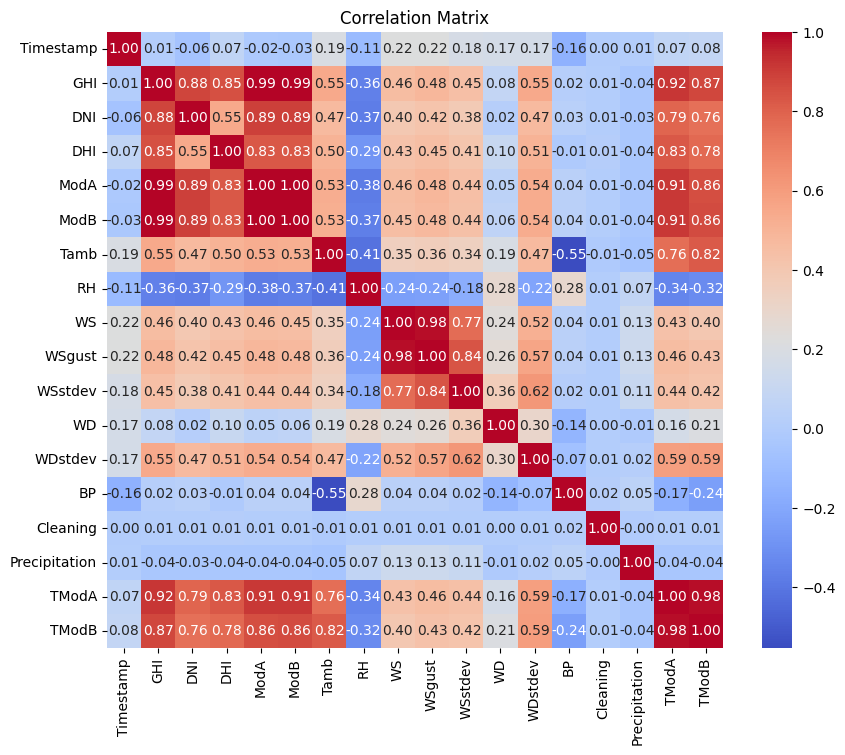

In [11]:
plot_correlation_matrix(df)

In [12]:
# Identify numeric columns

# Compute Z-scores and flag outliers (|Z| > 3)
numeric_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS","WSgust"]

# Compute Z-scores and flag outliers (|Z| > 3)
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outlier_flags = (z_scores > 3).any(axis=1)
print(f"Number of outlier samples flagged: {outlier_flags.sum()}")

Number of outlier samples flagged: 7740


##### 3.1 Imputation

Make an imputation Using median

In [13]:
for col in numeric_cols:
    df.loc[outlier_flags, col] = df[col].median()

In [14]:
numeric_cols = ["GHI_imp", "DNI_imp", "DHI_imp", "ModA_imp", "ModB_imp", "WS_imp","WSgust_imp"]

# Compute Z-scores and flag outliers (|Z| > 3)
# Adjust column names to match the actual DataFrame
numeric_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS","WSgust"]

# Compute Z-scores and flag outliers (|Z| > 3)
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outlier_flags = (z_scores > 3).any(axis=1)
print(f"Number of outlier samples flagged: {outlier_flags.sum()}")

Number of outlier samples flagged: 3635


In [15]:
print(f"Total samples: {len(df)}")
print(f"Percentage flagged: {100 * outlier_flags.sum() / len(df):.2f}%")

Total samples: 525600
Percentage flagged: 0.69%


Since the total samples is 565,600 and only 0.69% (3635) samples are flagged as outliers.

In [16]:
df_no_outliers = df[~outlier_flags]
print(f"Remaining samples: {len(df_no_outliers)}")


Remaining samples: 521965


Save the cleaned dataset

In [17]:
df_no_outliers.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3


In [18]:
outliers_df = df[outlier_flags]
outliers_df.to_csv("../data/flagged_outliers3.csv", index=False)

In [19]:
df_no_outliers.to_csv("../data/togo_clean.csv", index=False)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [21]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 521965 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      521965 non-null  datetime64[ns]
 1   GHI            521965 non-null  float64       
 2   DNI            521965 non-null  float64       
 3   DHI            521965 non-null  float64       
 4   ModA           521965 non-null  float64       
 5   ModB           521965 non-null  float64       
 6   Tamb           521965 non-null  float64       
 7   RH             521965 non-null  float64       
 8   WS             521965 non-null  float64       
 9   WSgust         521965 non-null  float64       
 10  WSstdev        521965 non-null  float64       
 11  WD             521965 non-null  float64       
 12  WDstdev        521965 non-null  float64       
 13  BP             521965 non-null  int64         
 14  Cleaning       521965 non-null  int64         
 15  Preci

#### 4. Univariate Visualizations

C:\Users\ASTU-PG\AppData\Local\Temp\ipykernel_25812\4200759757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Timestamp'] = pd.to_datetime(df['Timestamp'])


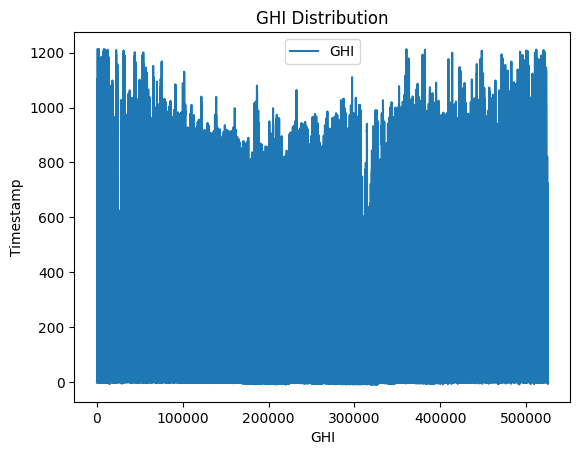

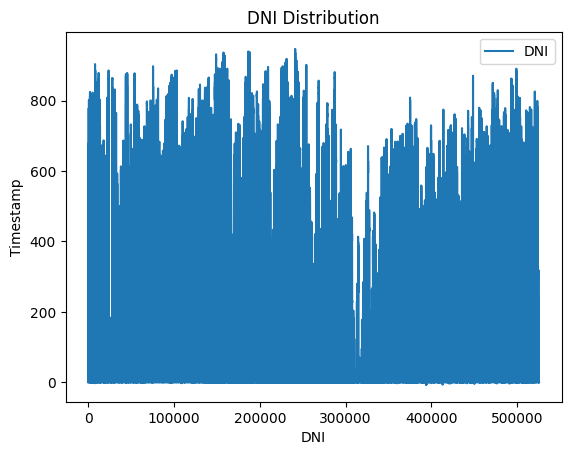

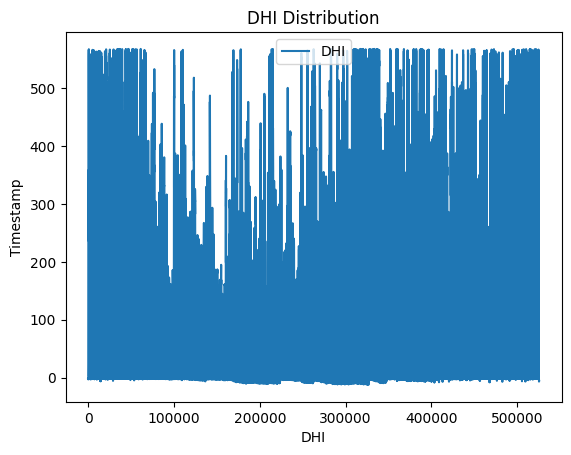

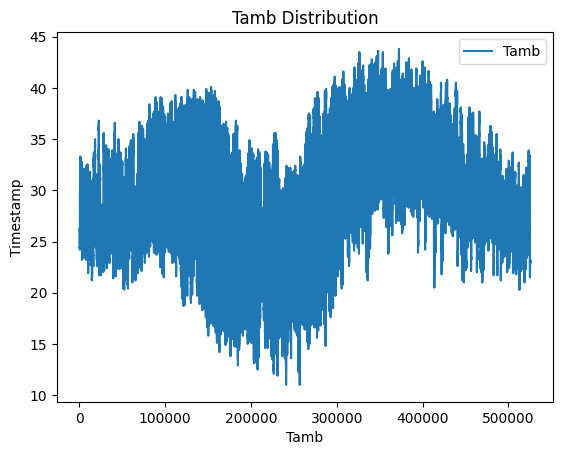

In [22]:
# Histograms for each numeric feature
df_no_outliers['Timestamp'] = pd.to_datetime(df['Timestamp'])
# Select columns to plot
cols_to_plot = ['GHI', 'DNI', 'DHI', 'Tamb']
for col in cols_to_plot:
    sns.lineplot(df_no_outliers[col], label=col)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Timestamp")
    plt.show()

Monthly Patterns

C:\Users\ASTU-PG\AppData\Local\Temp\ipykernel_25812\474369404.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Month'] = df_no_outliers['Timestamp'].dt.month


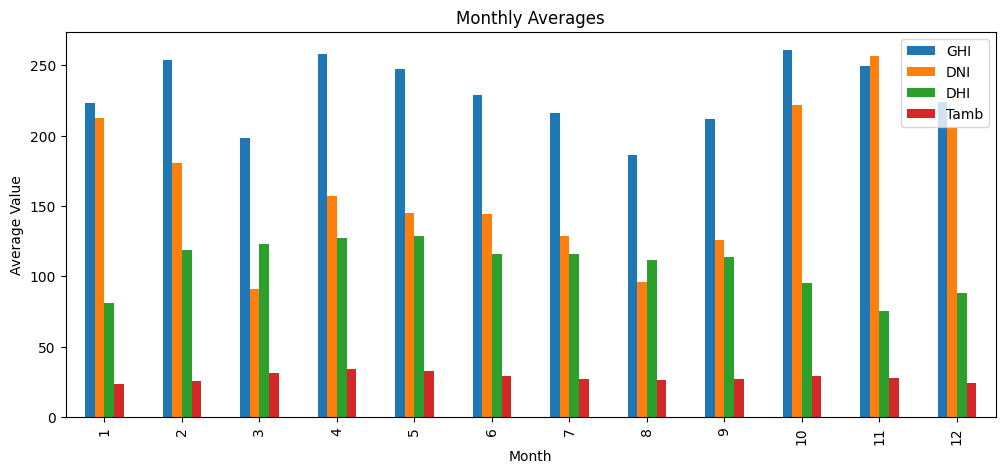

In [23]:
# Extract month from Timestamp
#df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # ensure it's datetime
df_no_outliers['Month'] = df_no_outliers['Timestamp'].dt.month

# Group by month and calculate mean
monthly_avg = df_no_outliers.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot
monthly_avg.plot(kind='bar', figsize=(12, 5), title='Monthly Averages')
plt.ylabel('Average Value')
plt.xlabel('Month')
plt.show()

Trends through the day

C:\Users\ASTU-PG\AppData\Local\Temp\ipykernel_25812\220155585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Hour'] = df_no_outliers['Timestamp'].dt.hour


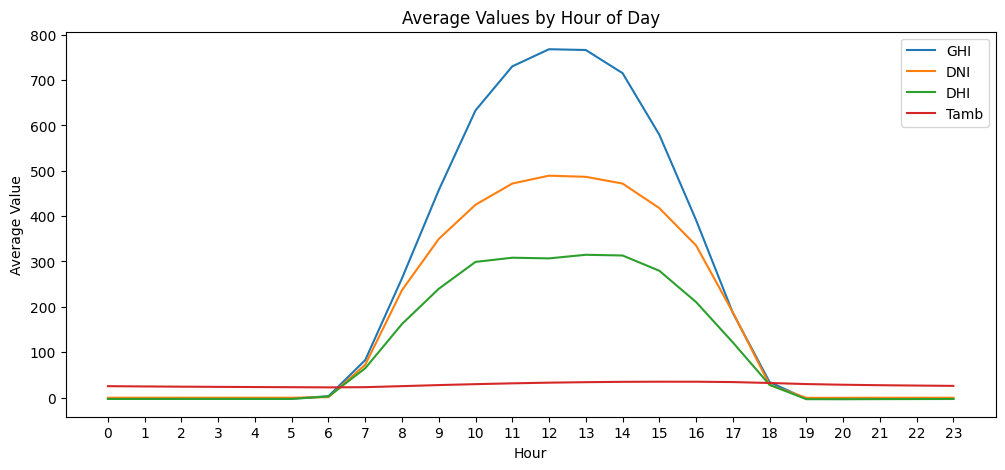

In [24]:
df_no_outliers['Hour'] = df_no_outliers['Timestamp'].dt.hour

# Group by hour of the day
hourly_avg = df_no_outliers.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot
hourly_avg.plot(figsize=(12, 5), title='Average Values by Hour of Day')
plt.ylabel('Average Value')
plt.xlabel('Hour')
plt.xticks(range(0, 24))
plt.show()


In [25]:
df1 = df_no_outliers

Anomalies Observation

C:\Users\ASTU-PG\AppData\Local\Temp\ipykernel_25812\3731589466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['GHI_roll_mean'] = df1['GHI'].rolling(window=24).mean()
C:\Users\ASTU-PG\AppData\Local\Temp\ipykernel_25812\3731589466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['GHI_roll_std'] = df1['GHI'].rolling(window=24).std()
C:\Users\ASTU-PG\AppData\Local\Temp\ipykernel_25812\3731589466.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

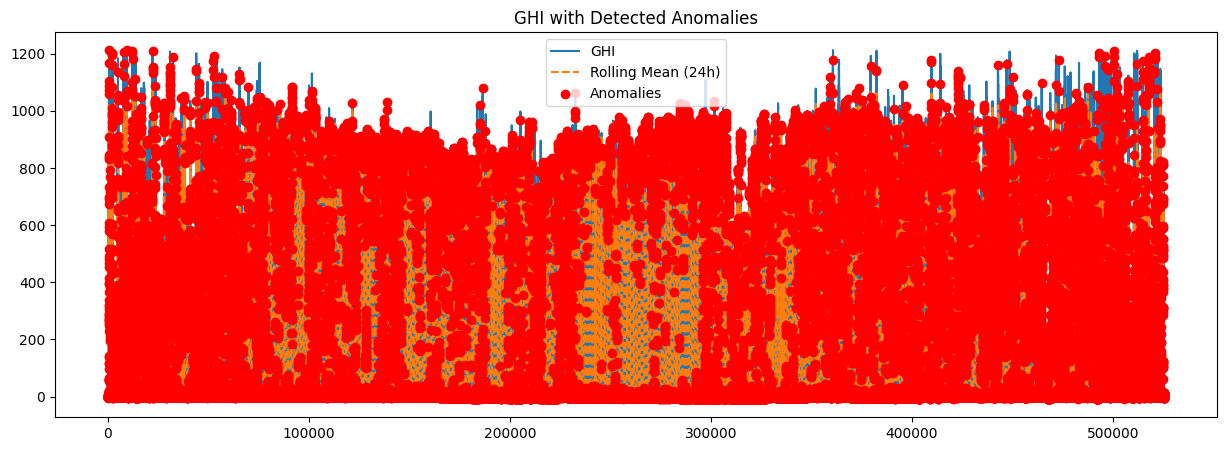

In [26]:
# Rolling mean and std for GHI
df1['GHI_roll_mean'] = df1['GHI'].rolling(window=24).mean()
df1['GHI_roll_std'] = df1['GHI'].rolling(window=24).std()

# Flag anomaly: GHI far from rolling mean
df1['GHI_anomaly'] = (np.abs(df1['GHI'] - df1['GHI_roll_mean']) > 2 * df1['GHI_roll_std'])

# Plot with anomalies
plt.figure(figsize=(15, 5))
plt.plot(df1['GHI'], label='GHI')
plt.plot(df1['GHI_roll_mean'], label='Rolling Mean (24h)', linestyle='--')
plt.scatter(df1.index[df1['GHI_anomaly']], df1['GHI'][df1['GHI_anomaly']], color='red', label='Anomalies', zorder=5)
plt.title("GHI with Detected Anomalies")
plt.legend()
plt.show()


C:\Users\ASTU-PG\AppData\Local\Temp\ipykernel_25812\3677364983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['DNI_roll_mean'] = df1['DNI'].rolling(window=24).mean()
C:\Users\ASTU-PG\AppData\Local\Temp\ipykernel_25812\3677364983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['DNI_roll_std'] = df1['DNI'].rolling(window=24).std()
C:\Users\ASTU-PG\AppData\Local\Temp\ipykernel_25812\3677364983.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

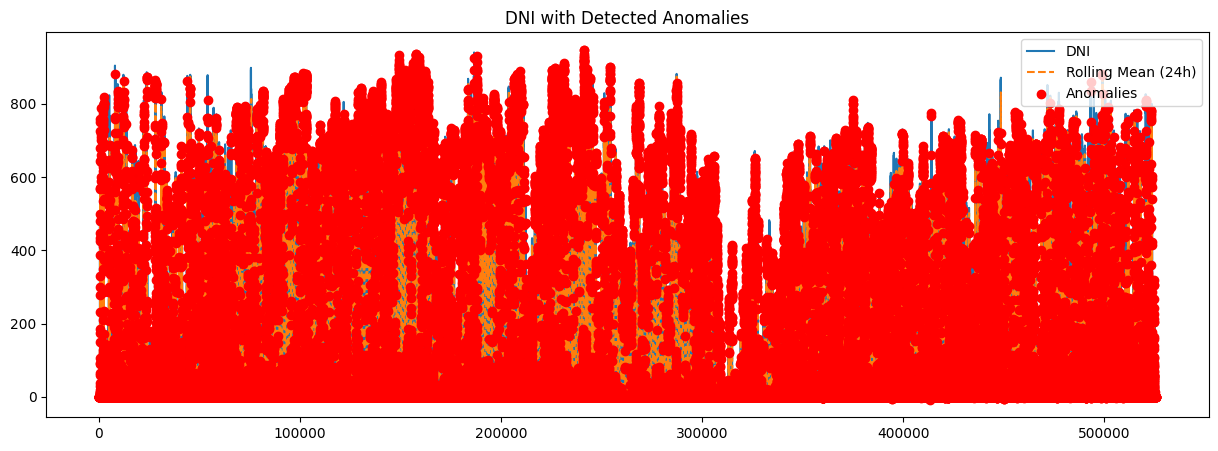

In [27]:
# Rolling mean and std for DNI
df1['DNI_roll_mean'] = df1['DNI'].rolling(window=24).mean()
df1['DNI_roll_std'] = df1['DNI'].rolling(window=24).std()

# Flag anomaly: GHI far from rolling mean
df1['DNI_anomaly'] = (np.abs(df1['DNI'] - df1['DNI_roll_mean']) > 2 * df1['DNI_roll_std'])

# Plot with anomalies
plt.figure(figsize=(15, 5))
plt.plot(df1['DNI'], label='DNI')
plt.plot(df1['DNI_roll_mean'], label='Rolling Mean (24h)', linestyle='--')
plt.scatter(df1.index[df1['DNI_anomaly']], df1['DNI'][df1['DNI_anomaly']], color='red', label='Anomalies', zorder=5)
plt.title("DNI with Detected Anomalies")
plt.legend()
plt.show()


C:\Users\ASTU-PG\AppData\Local\Temp\ipykernel_25812\3321279195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['DHI_roll_mean'] = df1['DHI'].rolling(window=24).mean()
C:\Users\ASTU-PG\AppData\Local\Temp\ipykernel_25812\3321279195.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['DHI_roll_std'] = df1['DHI'].rolling(window=24).std()
C:\Users\ASTU-PG\AppData\Local\Temp\ipykernel_25812\3321279195.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

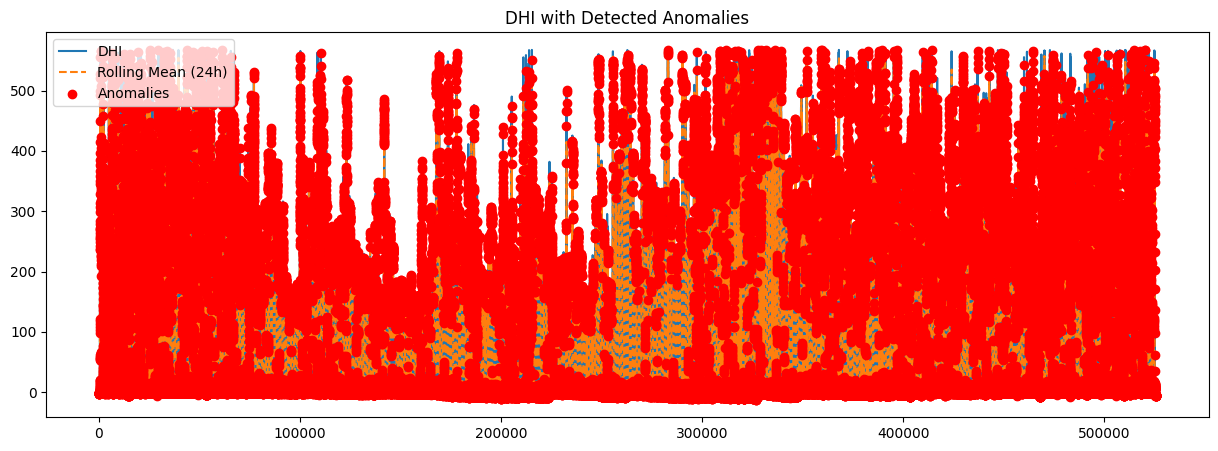

In [28]:
# Rolling mean and std for DNI
df1['DHI_roll_mean'] = df1['DHI'].rolling(window=24).mean()
df1['DHI_roll_std'] = df1['DHI'].rolling(window=24).std()

# Flag anomaly: GHI far from rolling mean
df1['DHI_anomaly'] = (np.abs(df1['DHI'] - df1['DHI_roll_mean']) > 2 * df1['DHI_roll_std'])

# Plot with anomalies
plt.figure(figsize=(15, 5))
plt.plot(df1['DHI'], label='DHI')
plt.plot(df1['DHI_roll_mean'], label='Rolling Mean (24h)', linestyle='--')
plt.scatter(df1.index[df1['DHI_anomaly']], df1['DHI'][df1['DHI_anomaly']], color='red', label='Anomalies', zorder=5)
plt.title("DHI with Detected Anomalies")
plt.legend()
plt.show()

C:\Users\ASTU-PG\AppData\Local\Temp\ipykernel_25812\1697343758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Tamb_roll_mean'] = df1['Tamb'].rolling(window=24).mean()
C:\Users\ASTU-PG\AppData\Local\Temp\ipykernel_25812\1697343758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Tamb_roll_std'] = df1['Tamb'].rolling(window=24).std()
C:\Users\ASTU-PG\AppData\Local\Temp\ipykernel_25812\1697343758.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

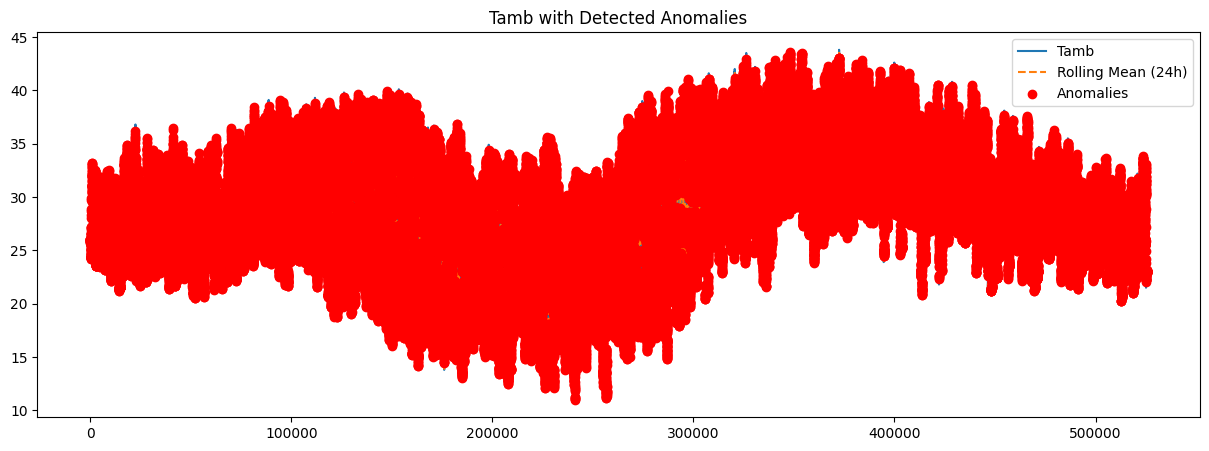

In [29]:
# Rolling mean and std for DNI
df1['Tamb_roll_mean'] = df1['Tamb'].rolling(window=24).mean()
df1['Tamb_roll_std'] = df1['Tamb'].rolling(window=24).std()

# Flag anomaly: GHI far from rolling mean
df1['Tamb_anomaly'] = (np.abs(df1['Tamb'] - df1['Tamb_roll_mean']) > 2 * df1['Tamb_roll_std'])

# Plot with anomalies
plt.figure(figsize=(15, 5))
plt.plot(df1['Tamb'], label='Tamb')
plt.plot(df1['Tamb_roll_mean'], label='Rolling Mean (24h)', linestyle='--')
plt.scatter(df1.index[df1['Tamb_anomaly']], df1['Tamb'][df1['Tamb_anomaly']], color='red', label='Anomalies', zorder=5)
plt.title("Tamb with Detected Anomalies")
plt.legend()
plt.show()

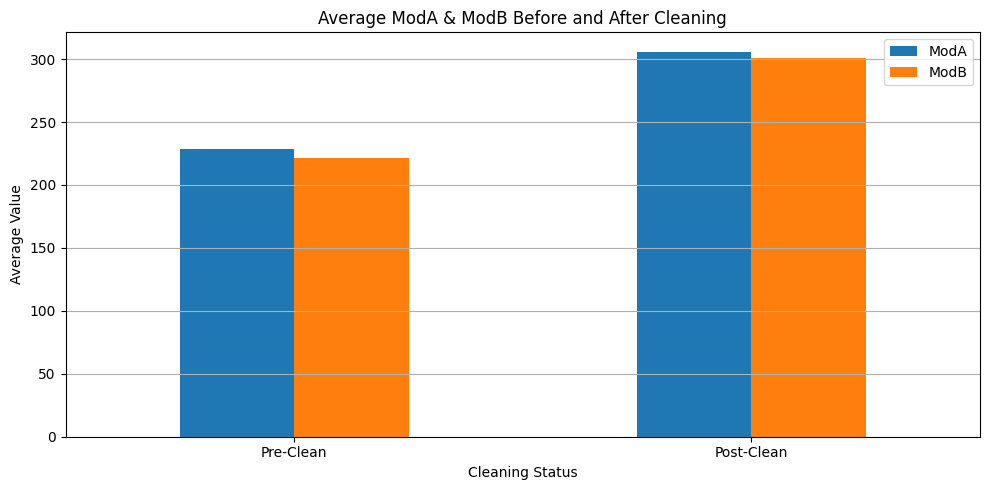

In [30]:
# Group by cleaning status
mod_avg = df.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Optional: rename index for clarity
mod_avg.index = ['Pre-Clean' if not x else 'Post-Clean' for x in mod_avg.index]

# Plot the result
mod_avg.plot(kind='bar', figsize=(10, 5), title='Average ModA & ModB Before and After Cleaning')
plt.ylabel('Average Value')
plt.xlabel('Cleaning Status')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

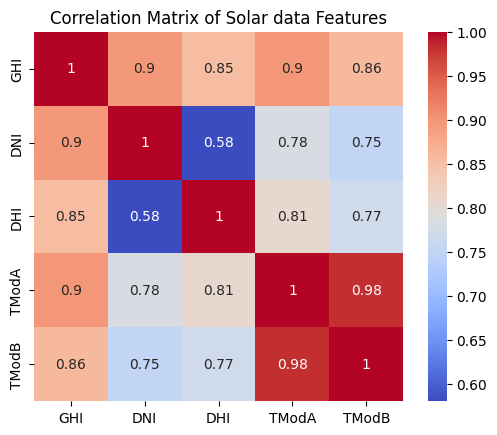

In [32]:
# Compute correlations
numeric_colss = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr = df1[numeric_colss].corr()

# Visualize
sns.heatmap(corr, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Solar data Features")
plt.show()

#### The correlation matrix shows that there is posetive relationship between those numic columns GHI, DNI, DHI, TModA, TModB

Bivariate Scatter Plots

In [ ]:
# Pairwise scatter of two features, colored by species
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. GHI vs Tamb
sns.scatterplot(data=df1, x='Tamb', y='GHI', ax=axes[0, 0], color='orange')
axes[0, 0].set_title('GHI vs Ambient Temperature')
axes[0, 0].set_xlabel('Ambient Temperature (°C)')
axes[0, 0].set_ylabel('GHI (W/m²)')

# 2. GHI vs RH
sns.scatterplot(data=df1, x='RH', y='GHI', ax=axes[0, 1], color='blue')
axes[0, 1].set_title('GHI vs Relative Humidity')
axes[0, 1].set_xlabel('Relative Humidity (%)')
axes[0, 1].set_ylabel('GHI (W/m²)')

# 3. Tamb vs RH
sns.scatterplot(data=df1, x='RH', y='Tamb', ax=axes[1, 0], color='green')
axes[1, 0].set_title('Ambient Temperature vs Relative Humidity')
axes[1, 0].set_xlabel('Relative Humidity (%)')
axes[1, 0].set_ylabel('Ambient Temperature (°C)')

# 4. WS vs GHI
sns.scatterplot(data=df1, x='WS', y='GHI', ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Wind Speed vs GHI')
axes[1, 1].set_xlabel('Wind Speed (m/s)')
axes[1, 1].set_ylabel('GHI (W/m²)')

plt.tight_layout()
plt.show()

In [ ]:
# Pairplot across all numeric features

#Select only the numeric columns
numeric_cols = df1.columns  # Add more columns if available

# Create the pairplot
sns.pairplot(df1[numeric_cols], corner=True, diag_kind='kde', plot_kws={'alpha': 0.5})

# Show plot
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.tight_layout()
plt.show()

#### Wind and Distribution Analysis

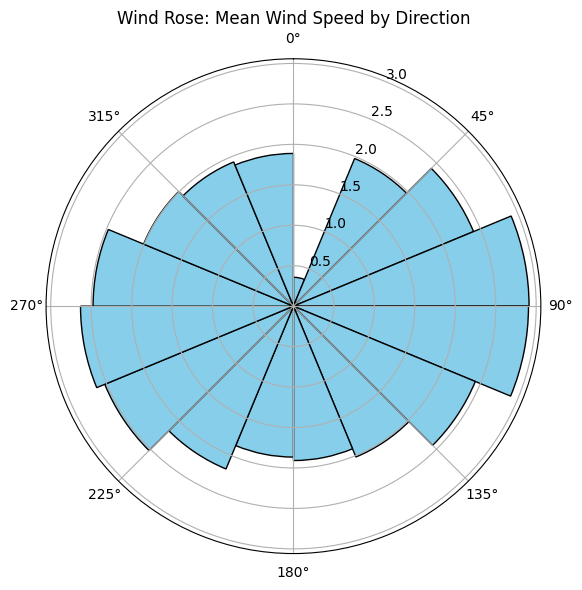

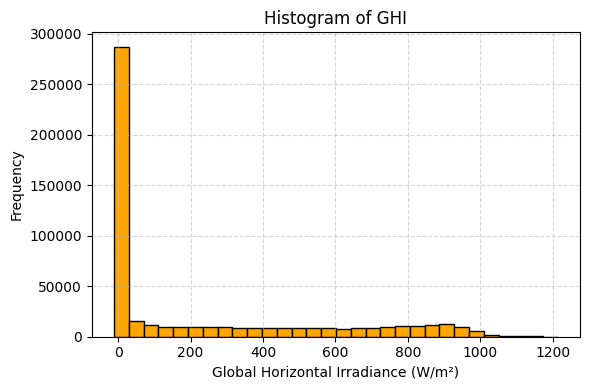

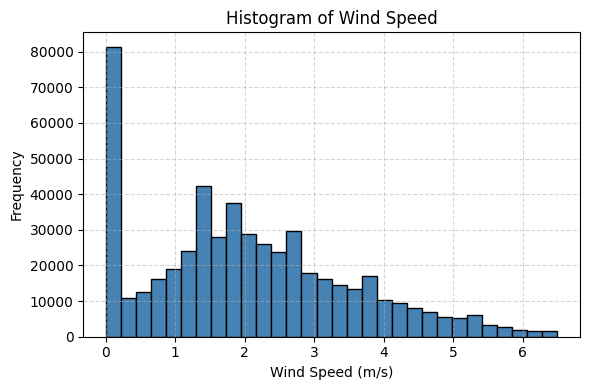

In [46]:
# --- 1. Wind Rose (Radial Bar Plot of Mean WS by WD) ---
wd = df1['WD']
ws = df1['WS']

# Define direction bins
num_bins = 16
bin_edges = np.linspace(0, 360, num_bins + 1)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Assign each wind direction to a bin and compute mean WS per bin
inds = np.digitize(wd, bin_edges, right=False) - 1
mean_ws_per_bin = [ws[inds == i].mean() for i in range(num_bins)]

# Plot wind rose
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='polar')
theta = np.deg2rad(bin_centers)
bar_width = np.deg2rad(360 / num_bins)

ax.bar(theta, mean_ws_per_bin, width=bar_width, align='center', color='skyblue', edgecolor='black')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title('Wind Rose: Mean Wind Speed by Direction')
plt.tight_layout()
plt.show()

# --- 2. Histogram of GHI ---
plt.figure(figsize=(6, 4))
plt.hist(df1['GHI'], bins=30, color='orange', edgecolor='black')
plt.title('Histogram of GHI')
plt.xlabel('Global Horizontal Irradiance (W/m²)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- 3. Histogram of WS ---
plt.figure(figsize=(6, 4))
plt.hist(df1['WS'], bins=30, color='steelblue', edgecolor='black')
plt.title('Histogram of Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### Temprature Analysis

In [39]:
df11 = df1[['RH','Tamb', 'GHI']]

In [40]:
df11.head()

,RH,Tamb,GHI
0,93.4,26.2,-1.2
1,93.6,26.2,-1.1
2,93.7,26.2,-1.1
3,93.3,26.2,-1.1
4,93.3,26.2,-1.0


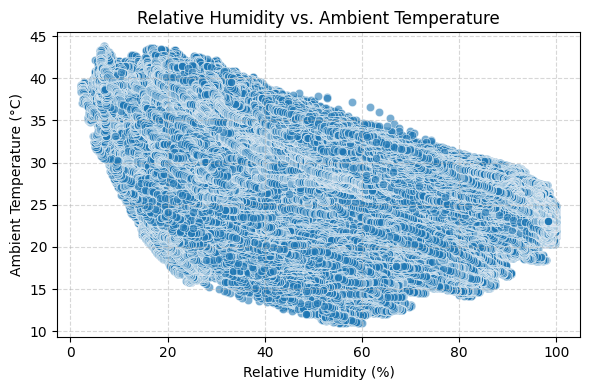

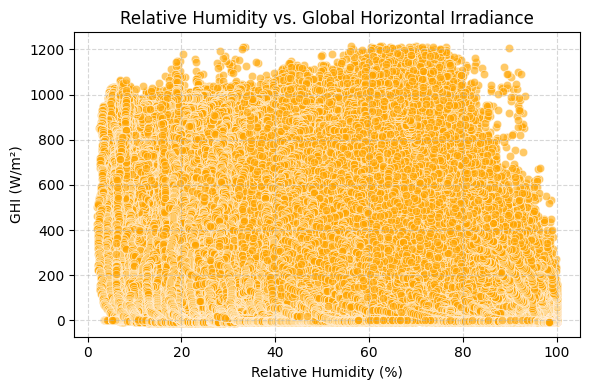

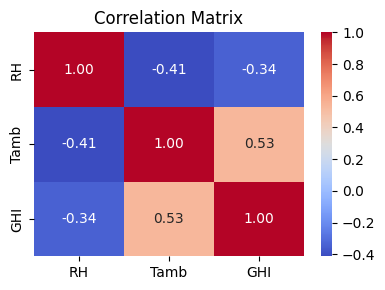

In [41]:
# --- 1. Scatter plot: RH vs Tamb ---
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df11, x='RH', y='Tamb', alpha=0.6)
plt.title('Relative Humidity vs. Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- 2. Scatter plot: RH vs GHI ---
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df11, x='RH', y='GHI', alpha=0.6, color='orange')
plt.title('Relative Humidity vs. Global Horizontal Irradiance')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- 3. Heatmap of correlation matrix ---
corr = df11[['RH', 'Tamb', 'GHI']].corr()

plt.figure(figsize=(4, 3))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

#### Temperature Analysis showing how Relative Humidity (RH) may influence both ambient temperature and solar radiation:

#### 1. Scatter Plot: RH vs Tamb

    Shows a slight negative trend: as RH increases, ambient temperature tends to decrease slightly.

    This is consistent with the idea that humid conditions often correlate with cooler, cloudier weather.

#### 2. Scatter Plot: RH vs GHI (Solar Irradiance)

    A clearer negative trend: higher RH usually coincides with lower solar radiation, likely due to cloud cover blocking sunlight.

#### 3. Correlation Matrix

    Confirms negative correlation between RH and both Tamb and GHI.

### Bubble chart

In [43]:
df2 = df1[['GHI','RH','Tamb', 'BP']]

In [44]:
df2.head()

,GHI,RH,Tamb,BP
0,-1.2,93.4,26.2,998
1,-1.1,93.6,26.2,998
2,-1.1,93.7,26.2,997
3,-1.1,93.3,26.2,997
4,-1.0,93.3,26.2,997


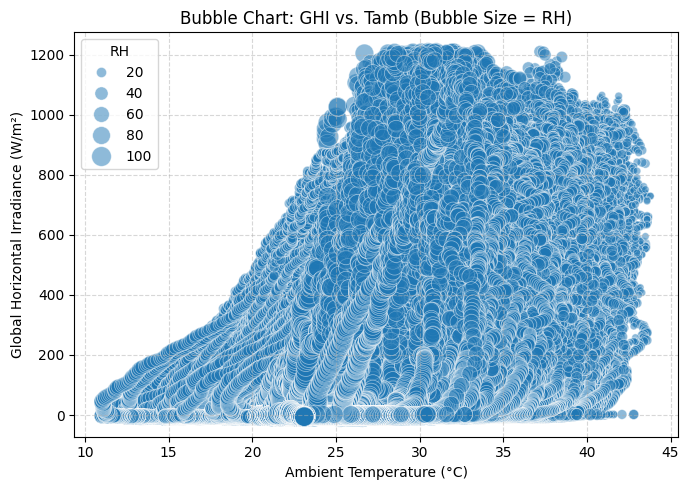

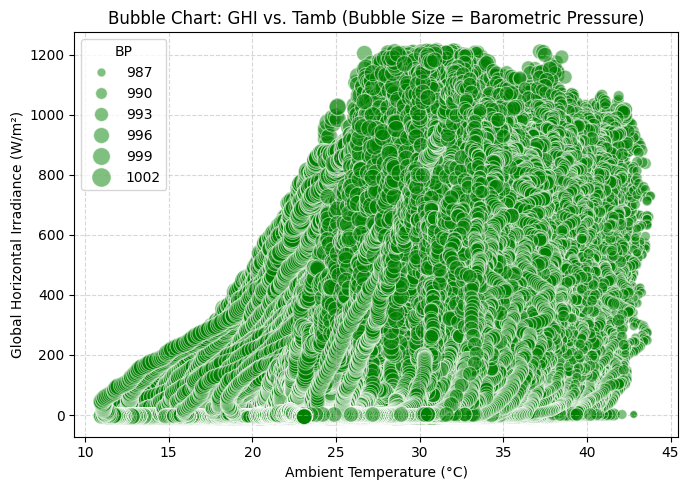

In [45]:
# --- Bubble Chart: GHI vs Tamb with bubble size = RH ---
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df2, x='Tamb', y='GHI',
    size='RH', sizes=(20, 200),
    alpha=0.5, legend='brief'
)
plt.title('Bubble Chart: GHI vs. Tamb (Bubble Size = RH)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Global Horizontal Irradiance (W/m²)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Bubble Chart: GHI vs Tamb with bubble size = BP ---
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df2, x='Tamb', y='GHI',
    size='BP', sizes=(20, 200),
    alpha=0.5, color='green', legend='brief'
)
plt.title('Bubble Chart: GHI vs. Tamb (Bubble Size = Barometric Pressure)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Global Horizontal Irradiance (W/m²)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Bubble Charts analyzing the relationship between ambient temperature (Tamb) and solar irradiance (GHI):

##### 1. Bubble Size = RH (Relative Humidity)

   Highlights how variations in humidity relate to GHI and Tamb.

   Larger bubbles (high RH) tend to cluster in lower GHI zones, reinforcing the earlier correlation.

##### 2. Bubble Size = BP (Barometric Pressure)

   Illustrates pressure’s role, though typically less impactful on GHI than RH.

   May show subtle trends, especially for identifying weather system patterns.